# Feature Representation

The format we receive real world data in varies greatly and often needs to be modified before it can be used in machine learning models. The data must often be transformed to create a **representation** of the data which can be used.  

Representing features optimally is the most important technical task in most machine learning problems. It is where practitioners of machine learning spend most of their time and it often has _the largest impact on performance_ of anything you can do.


Data comes in many types:
 
* real valued numbers : petal length
* Categorical data: species name
* constrained data: like ratios or compositional data 


## Real-world data is messy

 As an example lets think about a classifier that identifies genes involved in resisting a plant disease
 
 If the gene is involved it has a label=1. If it is not involved its label label=0.
 
 It has the following traits:
 
feature | type  | example
-------|--------|-------
functional category | String | "K00680"
gc_content | int between 1,0 | 0.56
length| positive int | 1901
identified promoter | Boolean | true
intron length | positive int | 300
 
 ```
 0:{functional_category: "K00680",
    gc_content: 0.56,
    length: 1901,
    identified_promoter: True,
    intron_length: 300
    }
 ```
 
 ### Encoding Strings with one hot encoding

In the first example the functional category essentially a level in a factor variable.  A common way to encode this in machine learning is the **_one hot encoding_**.

Each unique string in a dataset is given a position in a feature vector and assigned a 1 if it is present.

possible functional categories
```
categories = ["K00001", "k00456", "K00680", ...]
example    = [    0  ,    0   ,    1   , ...]
```

The vector for this example would be:

 ```
 0:{functional_category: [0,0,1],
    gc_content: 0.56,
    length: 1901,
    identified_promoter: True,
    intron_length: 300
    }
```

A one hot vector can get really long, but don't worry, we can encode that long vector as a sparse vector that doesn't take up too much memory.



In [3]:
from sklearn import preprocessing


# create dataset with two categorical vaiables: Genus and Health

X = [['Zea', 'healthy'], ['Arabidopsis', 'healthy'], ['Glycine', 'diseased']]

# Create an encoder for the data

enc = preprocessing.OneHotEncoder()
# Fit the encoder to the data (this tells it to make 3 categories for Genue and two for health)
enc.fit(X)  

# now thrasnform the same data into a sparse vector with one hot encoding 
sparse_vect = enc.transform([['Zea', 'healthy'], ['Arabidopsis', 'healthy'], ['Glycine', 'diseased']])

# verify what that sparse vector look like
sparse_vect.toarray()

array([[0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.]])

## A note on fitting and transforming

> You may have noticed that we create a transformer object, fit it then transform the data. **_Why would we take three steps to do what we could to in one?_**
> The reason is that we will want to apply the same transformation to the data we are classifying as the data we trained on. The transformer object holds information about the methods of transformation. Fitting the transformer sets the values used in the transformation and calling the transform method applies that transformation to the data.  That data can be the original training data or new data that needs to be classified. 


### Numeric values

* Numeric values both integer and real care already in a form that can be user as features in a ML model.

* Be careful though, sometimes a number is really just a label. Suppose we had trimmed the "K" prefix off our functional category features.  Now our feature would be `00680`, an integer which corresponds to a N'acyltransferase enzyme in the KEGG gene ontology.  That has nothing to do with `00681` which is a  glutathione hydrolase enzyme.  In this case we need to use one hot encoding.

**Does it mater that these numeric values are in different number spaces (real, integer, constrained?**

Yes, it does.  Often data needs to be standardized or binned to make it easer to learn.

### Putting it together, encoding this example:

The final form of the features for this example looks like this: 

```{python}

0: [0.0, 0.0 ,1.0 , 0.56, 1901, 1, 300 ]
```

## What makes a good feature?

1. It should be non-zero more than a few times. If there are not many examples of it in the training data then it isn't of much value in learning 

2. Represent the values in a way that makes sense to humans if possible. This make's troubleshooting easier 

3. Don't use magic values as flags. For example sdon't use -1 to indicate that there were no introns in the sample above

# Cleaning up data 


The old adage "Garbage in, garbage out" very much applies to machine learning. Much of the work of the data scientist is data cleaning. Most data cleaning starts with data visualization.  IF the feature space is not too large the distribution of of each variable can show outliers. Reduced representations of data such as PCA can show outliers in high dimension data sets. There are a number of tools for cleaning data one of the easiet to use is [Open Refine](http://openrefine.org/). See [this tutorial](https://datacarpentry.org/OpenRefine-ecology-lesson/00-getting-started/) for more information.


Once outliers have been removed you need to evaluate the need for data transformation and standardization. Some menthods like Random forest classifiers (covered later) do not need data to fit a particular distribution. Other methods like Logistic regression work better it the data is transformed and standardized.



## Transformation

Data transformations map numbers from one space to another space.  This can be as simple as applying a transformation function like taking the log of of values or more complex operations can be used. Lets explore this with some univariate data. We will use the poutput file from Diamond, a Nucleotide Local Alignment Search program.  In this dataset Contigs from a Mosquito metagenome are being identified.

In [4]:
import pandas
import numpy as np
data = pandas.read_csv("../nb-datasets/testreport.txt", sep="\t", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11
0,NODE_946_length_521_cov_1.379828,EFT80074.1,100.0,119,0,0,358,2,1,119,2.900000e-58,234.2
1,NODE_17973_length_218_cov_2.533742,XP_017472278.1,39.1,69,41,1,9,212,358,426,1.300000e-04,54.7
2,NODE_11115_length_248_cov_1.740933,ACY55405.1,95.1,82,4,0,246,1,131,212,2.800000e-27,130.2
3,NODE_20_length_3112_cov_8.563952,WP_072651139.1,69.4,111,34,0,1231,1563,1,111,8.700000e-33,152.1
4,NODE_8606_length_266_cov_2.573460,ATN41881.1,88.6,88,10,0,3,266,139,226,7.400000e-26,125.6
5,NODE_20994_length_209_cov_1.493506,ERS32318.1,100.0,69,0,0,2,208,108,176,2.000000e-34,153.7
6,NODE_3703_length_342_cov_1.264808,GAE68653.1,98.3,60,1,0,341,162,216,275,1.500000e-23,118.2
7,NODE_3936_length_335_cov_4.157143,KXJ62446.1,100.0,63,0,0,146,334,1,63,2.600000e-28,134.0
8,NODE_16824_length_222_cov_1.652695,OFS44974.1,98.6,74,1,0,222,1,137,210,1.100000e-30,141.4
9,NODE_13215_length_237_cov_1.258242,XP_022819396.1,42.3,78,44,1,5,235,954,1031,2.200000e-08,67.4


Let's plot the e-values.

In [5]:
import seaborn as sns
sns.set_style('darkgrid')
evalue = data[10]
sns.distplot(evalue)


As expected , they look pretty clumped up because they are in log space, so lets transform them.

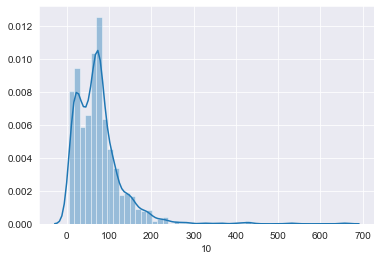

In [6]:

neg_log_eval = -np.log(data[10])
sns.distplot(neg_log_eval)


This looks better but the center is around 100 and the data is a bit skewed.  Many learning methods perform better when the data is more symmetrical and scaled similarly across features.  So lets try applying a **_standardization_** to our data. 

Standardization transforms our data into a dataset with a mean of 0 and a standard deviation of 1.

Here is more information from from [Scikit learn](https://scikit-learn.org/stable/modules/preprocessing.html):

"Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.
"


Mean is :4.9737991503207014e-17
SD is :1.0


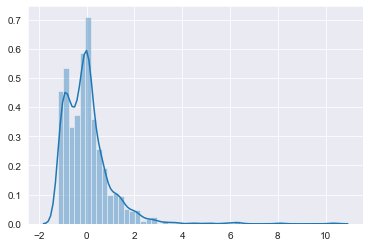

In [7]:
from sklearn import preprocessing
eval_scaled = preprocessing.scale(neg_log_eval)
sns.distplot(eval_scaled)
print("Mean is :" + str(eval_scaled.mean()))
print("SD is :" + str(eval_scaled.std()))

Standardization is usually sufficient even when a population is not normally distributed. But sometimes we want to map data onto a different distribution all together. Quantile transformations and power transformations are available to do this.


In [13]:
# Create a transformer that uses the Yeo-Johnson transformation
pt = preprocessing.PowerTransformer(standardize=True)

logdat = -np.log(np.array(data.iloc[:,10:11]))
eval_bc_trans = pt.fit_transform(logdat)

#sns.distplot(eval_bc_trans)
eval_bc_trans.shape

SyntaxError: invalid syntax (<ipython-input-13-ef38d4159101>, line 4)

# Key steps to feature engineering

1. Understand your data and the distribution of the features
2. fix errors, outliers and magic values
3. Convert features into a format suitable for your data.
4. scale or transform the features to fit the assumptions of your learning model.